<div style="background-color: #FFFACD; padding: 10px;">

# Machine Learning MRes Glossary

<div style="background-color: #FFFACD; padding: 10px;">

## Index:

</div>

*Optional knowledge to the course are labeled with a star(\*)* 

- [Types of Machine Learning](#types-of-machine-learning)
- [Hyperparameters](#Hyperparameters)
- [Overfitting & Underfitting ](U&O)
- [Bias vs. Variance](#B&V)
- [Bias and Error](#B&E)
- [Regression](#regression)
- [Cost Function](#cost-function)
- [Loss Function](#loss-function)
- [Least Squares](#least-squares)
- [Classification](#classification)
- [Gradient-Based Optimisation](#gradient-based-optimisation)
    - [Newton Method](#Newton-Method)
    - [Gradient Descent](#gradient-descent)
- [Dimensionality Reduction](#dimensionality-reduction)
- [SVD Visualisation](#svd-visualisation)
- [KNN](#KNN)
- [Instance-Based Learning](#Instance-Based-Learning)
- [Model-Based Learning](#Model-Based-Learning)
- [Activation Function](#Activation-Function)
    - [Activation Function Overview](#Activation-Function-Overview)
- [Neural Network](#NN)
    - [Forward and Backward Propagation](#FBP)
    - [Weight](#Weight)
    - [Learning rate](#Learning-rate)
- [Types of Neural Networks](#TNN)
    - [ANN](#ANN)
    - [CNN](#CNN)
    - [GNN*](#GNN)
    - [RNN*](#RNN)


*Refer to HOML for additional information*

This is a notebook that groups important concepts included within the ML course. Keywords are included within the index list (open the sections for interactive code).

Run the cells below:

In [1]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


<div style="background-color: #FFFACD; padding: 10px;">

# Types of Machine Learning Systems

There are so many different types of Machine Learning systems that it is useful to classify them in broad categories based on:
• Whether or not they are trained with human supervision (supervised, unsuper‐ vised, semisupervised, and Reinforcement Learning)
• Whether or not they can learn incrementally on the fly (online versus batch learning)
• Whether they work by simply comparing new data points to known data points, or instead detect patterns in the training data and build a predictive model, much like scientists do (instance-based versus model-based learning)
These criteria are not exclusive; you can combine them in any way you like. For example, a state-of-the-art spam filter may learn on the fly using a deep neural net‐ work model trained using examples of spam and ham; this makes it an online, model- based, supervised learning system.

Refer to pg 36 onwards in HOML

<div style="background-color: #FFFACD; padding: 10px;">

# Hyperparameters

</div>

Hyperparameters are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning. The prefix **‘hyper_’** suggests that they are **‘top-level’** parameters that control the learning process and the model parameters that result from it.

In this example:
```python 
# Creating a Random Forest Classifier object
rf = RandomForestClassifier(n_estimators=100, max_depth=10)

# n_estimators and max_depth are hyperparameters

# Training the model on the training data
rf.fit(X_train, y_train)

# Predicting on the test data
y_pred = rf.predict(X_test)
```
In this example, `n_estimators` and `max_depth` are hyperparameters of the Random Forest Classifier. They are set before training the model and determine the number of decision trees to be used (n_estimators) and the maximum depth of each tree (max_depth).

<div style="background-color: #FFFACD; padding: 10px;">

# Overfitting and Underfitting (homl) 

</div>

**Overfitting** happens when the model is too complex relative to the amount and noisiness of the training data. The possible solutions are:
- To simplify the model by selecting one with fewer parameters (e.g., a linear model rather than a high-degree polynomial model), by reducing the number of attributes in the training data or by constraining the model
- To gather more training data
- To reduce the noise in the training data (e.g., fix data errors and remove outliers)

Constraining a model to make it simpler and reduce the risk of overfitting is called regularisation. For example, the linear model we defined earlier has two parameters, $θ_0$ and $θ_1$. This gives the learning algorithm two degrees of freedom to adapt the model to the training data: it can tweak both the height ($θ_0$) and the slope ($θ_1$) of the line. If we forced $θ_1 = 0$, the algorithm would have only one degree of freedom and would have a much harder time fitting the data properly: all it could do is move the line up or down to get as close as possible to the training instances, so it would end up around the mean. A very simple model indeed! If we allow the algorithm to modify $θ_1$ but we force it to keep it small, then the learning algorithm will effectively have some‐ where in between one and two degrees of freedom. It will produce a simpler model than with two degrees of freedom, but more complex than with just one. You want to find the right balance between fitting the training data perfectly and keeping the model simple enough to ensure that it will generalise well.

As you might guess, **underfitting** is the opposite of **overfitting**: it occurs when your model is too simple to learn the underlying structure of the data. For example, a lin‐ ear model of life satisfaction is prone to underfit; reality is just more complex than the model, so its predictions are bound to be inaccurate, even on the training examples.
The main options to fix this problem are:
• Selecting a more powerful model, with more parameters
• Feeding better features to the learning algorithm (feature engineering)
• Reducing the constraints on the model (e.g., reducing the regularisation hyper‐ parameter)

In this code, 30 samples were generated from a sine function with some added noise. Then a polynomial features and a linear regression model are created for three different degrees: 1 (underfitting), 4 (good fit), and 15 (overfitting). The graph will show the samples, the true function, and the predicted function for each model. It will also display the mean squared error (MSE) for each model as the title, which indicates how well the model fits the data.

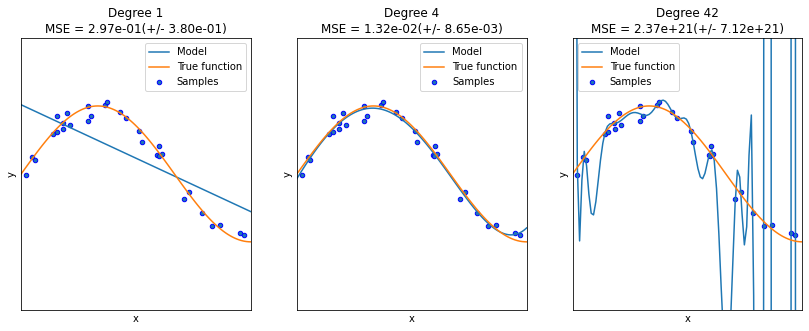

In [2]:
# visual repersentation of over and underfitting
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.sin(1.5 * np.pi * X)

np.random.seed(42)

n_samples = 30
degrees = [1, 4, 42]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsise=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()


<div style="background-color: #FFFACD; padding: 10px;">

# Bias vs. Variance

</div>

Here, we will describe what is sometimes known in Machine Learning as the *no-free-lunch theorem*. It describes the fact that an unbiased model will generally have high variance and, conversely, reducing the variance will increase the bias. Therefore, both aspects need to be balanced to achieve models whose predictions are as close as possible to the true value (‘accurate’) with as reduced variability as possible.

Here, we mention a few aspects related to this issue. In statistics, one calls an ‘estimator’ a rule to estimate a given quantity based on observed data. Let $\beta$ be the true parameters of the problem to be estimated and $\beta^*$ the least-squares estimate, and $\mathbb{E}$ is the expected value. First, we define two measures: 

$$Bias: ||\mathbb{E}[\beta^*] − \beta||$$
$$Variance: \mathbb{E}[(\beta−\beta^*)(\beta−\beta^*)^T]$$

The model formulation for the linear regression, ε is the residual term:

$$y=X\beta+ε$$ 
$$ε∼\mathcal{N}(0,σ^2)$$


We can then compute the expectation of our estimated parameters:


\begin{align*}
\mathbb{E}[\beta^*] &= \mathbb{E}[((X^TX)^{-1}X^Ty)] \\
&= \beta + \mathbb{E}[((X^TX)^{-1}X^Tε)] \\
&= \beta
\end{align*}

We see that this particular estimator $(\beta^*)$ is unbiased, i.e. $||\mathbb{E}[\beta^*] − \beta||$ = 0. That is if we obtain an estimate for a new set of samples drawn from the same data source, then we will always expect to get the right $\beta$ on average.

However, this is not the whole story. On average, we will get the correct estimate, but what about the variance of our estimator? This can also obtained easily from our expressions above as follows:

Here is the aligned version of the equations with equal signs properly aligned:

\begin{align*}
\mathbb{E}[(\beta - \beta^*)(\beta - \beta^*)^T] &= \mathbb{E}[(X^T X)^{-1}X^T \epsilon \epsilon^T X(X^T X)^{-1}] \\
&= (X^T X)^{-1} \sigma^2
\end{align*}

In this aligned representation, the equal signs are aligned vertically, making it easier to see the logical flow and relationships between the equations.

$$ \epsilon \epsilon^T = \sigma^2I$$

where $I$ is the identity matrix.

Note that $σ^2$ is the variance of the noise in the observations, which we can estimate from the data. In statistical terms, the estimator for $σ^2$ is:

$$
\hat{\sigma}^2 = \frac{1}{N-(p+1)} (y-\hat{y})^T(y-\hat{y})
$$

where we use the symbol $\hat{.}$ to denote quantities estimated from data. Hence, the variance of our estimated parameters depends on the observed variance of the data and on the properties of $(X^T X)^{-1}$. However, $(X^T X)$ might be badly conditioned. 

The above arguments tell us that although LS is unbiased (good!), it can have high variance in the estimated parameters (depending on properties of the data matrix X). One could think that perhaps we could do better than LS. However, there is a general result (that follows from the Gauss-Markov theorem) that tells us that if we restrict ourselves to a linear unbiased estimator, we cannot do better than LS. We only sketch briefly the arguments here (see Hastie, Tibshirani, Friedman, "The Elements of Statistical Learning," Chap. 3, for more details).

In general, for an estimator $\theta^*$ of the true value $\theta$, we always have that:


\begin{align*}
\mathbb{E}[(\theta - \theta^*)^2] &= \mathbb{E}[\theta^2] + \mathbb{E}[\theta^{*2}] - 2\mathbb{E}[\theta\theta^*] \\
&= \theta^2 + \text{var}(\theta^*) + \mathbb{E}[\theta^*]^2 - 2\theta\mathbb{E}(\theta^*) \\
&= \text{var}(\theta^*) + (\theta - \mathbb{E}[\theta^*])^2
\end{align*}

where we have used the fact that $\theta$ is the true value to be estimated, i.e., not a random variable.

Let $\beta^*_{LS}$ define the LS estimator such that $\hat{f}_{LS}(x_0) = x^T \beta^*_{LS}$, which is unbiased:

$$
\mathbb{E}[\hat{f}(x_0)] = x_0^T \beta
$$

where $\beta$ is the true value. Then we have:

$$
\text{MSE} = \mathbb{E}[(\hat{f}-y)^2] = \text{var}(\hat{f}) + (\hat{y} - \mathbb{E}[\hat{f}])^2 = \text{Variance} + \text{Bias}^2
$$

This simple expression already highlights the main issue, i.e., that by minimising the MSE we could face a compromise between variance and bias.


Let $\hat{\hat{f}}$ be another unbiased linear estimator different to LS. Recall that, according to the Gauss-Markov theorem, the least squares estimator is the best unbiased linear estimator (see Hastie, Tibshirani, Friedman, The Elements of Statistical Learning, Chap. 3, section 3.2.2 for more details). Hence we know that:

$$var(\hat{f}_{LS}(x_0)) ≤ var(\hat{\hat{f}}(x_0))$$

Since we have
$$MSE=\mathbb{E}|(\hat{f}−y)^2|=var(f)+(y−\mathbb{E}|f|)^2$$
then it follows directly that LS has the lowest MSE of all linear unbiased estimators.

The consequence is clear: if we want to stick with a linear model and we want it to be unbiased, we cannot do better than least-squares. On the other hand, as we can see in the image below, least-squares can have large variance.

If we want to remain within linear methods, either we do something about $X^TX$ (see img below), or we go for linear methods with a bias. That is the topic of the next section.
It is probably good to end with a visual representation of this discussion. Effectively, how good an estimator is depends on a combination of as low a bias and as low a variance as possible. You can see an illustration of this idea, and how in some cases we might be better off with an estimator that has some bias (i.e., it is a bit inaccurate) but has reduced variability (i.e., it is more reliable).

![Bias](bias.png)


 Overview of the trade-off between bias and variance. Each black dot represents an estimate $\beta^*$ of the true $\beta$ (in green). In case a), we have an almost ideal case, with zero bias and small variance, which is rarely achievable in reality. Case b) shows the worse case scenario: having large bias and low variance will lead to a badly fit model. Case c) will be a somewhat good model, but with a large variance. Note that the least squares method has this issue. Finally, case d) shows the other side of the trade-off, where a small variance was achieved by introducing some small bias. In reality, one must often choose between c) and d).


<div style="background-color: #FFFACD; padding: 10px;">

 #### **Search for methods to reduce variance if you are interested...**

</div>


<div style="background-color: #FFFACD; padding: 10px;">

# Bias and Error
</div>

Bias refers to the systematic deviation or error between the expected or average prediction of a model and the true or target value in the data. It measures how far, on average, the predicted values are from the actual values. Bias can arise from assumptions or simplifications made by the model that do not capture the true underlying relationship.

Error, on the other hand, is a broader term that encompasses both bias and other sources of discrepancy between predicted and actual values. Error includes both systematic deviations (bias) and random fluctuations or noise in the data.

<div style="background-color: #FFFACD; padding: 10px;">

# Regression
</div>

**Linear Regression** - The process of linear regression attempts to fit a straight line to a set of data, as well as possible. For this we require a metric known as the cost function (defined below), which essentially describes how poorly the line fits the data - this is to be minimised, corresponding to the best-fitting line. The aim of a linear regression model is to be able to accurately predict a continuous outcome given a set of predictors. This differs from classification, where the set of all outcomes is a finite number of categories.

The code performs linear regression using gradient descent to find the best-fit line for a given set of random data points (**x** and **y**). It iteratively updates the parameters (**ε**) based on the gradients of the cost function, aiming to minimise the mean squared error between the predicted values and the actual target values. The code then prints the final parameter values and visualises the data points along with the learned linear regression line.

Let the linear regression model be:
$$
y=Xβ+ε
$$

Iteration 0: Cost = 23.16269063840338
Iteration 100: Cost = 2.3960304799611474
Iteration 200: Cost = 2.0512085196160754
Iteration 300: Cost = 2.2546506740724785
Iteration 400: Cost = 2.3221404544880913
Iteration 500: Cost = 2.3397982017050603
Iteration 600: Cost = 2.3442057969839536
Iteration 700: Cost = 2.3452939087910947
Iteration 800: Cost = 2.345561812749283
Iteration 900: Cost = 2.3456277299335
Final parameters:
theta_0 = 3.1299230096458617
theta_1 = 2.10896562748133


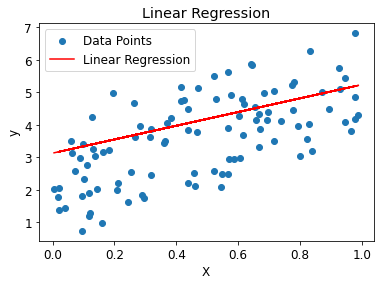

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.randn(100, 1)

# Initialise parameters
eta = np.random.randn(2, 1)
learning_rate = 0.01
num_iterations = 1000

# Perform gradient descent
for iteration in range(num_iterations):
    # Compute predictions
    y_pred = x.dot(eta[1]) + eta[0]
    
    # Compute gradients
    gradients = 2 / len(x) * x.T.dot(y_pred - y)
    
    # Reshape gradients to match theta shape
    gradients = gradients.mean(axis=1, keepdims=True)
    
    # Update parameters
    eta -= learning_rate * gradients
    
    # Compute cost, this is an example of a cost function
    cost = np.mean((y_pred - y) ** 2)
    
    # Print cost every 100 iterations
    if iteration % 100 == 0:
        print(f"Iteration {iteration}: Cost = {cost}")

# Print final parameters
print("Final parameters:")
print(f"theta_0 = {eta[0][0]}")
print(f"theta_1 = {eta[1][0]}")

# Plot the data points and the linear regression line
plt.scatter(x, y, label='Data Points')
plt.plot(x, x.dot(eta[1]) + eta[0], color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()



<div style="background-color: #FFFACD; padding: 10px;">

# Cost Function

</div>

The formula used to compute the cost is given by:

$
J(\theta) = \frac{1}{2} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
$

Where:
- $J(\theta)$ represents the cost function.
- $m$ is the number of training examples.
- $h_\theta(x^{(i)})$ represents the predicted value for the $i$ th training example, obtained by multiplying the input features ($x^{(i)}$) with the parameters ($\theta$).
- $y^{(i)}$ represents the actual target value for the $i$ th training example.

The aim of linear regression is to find the optimal set of parameters ($c$, $\theta_1$, $\theta_2$, ...) that minimises the cost function. This involves finding the global minimum of the cost function on a multi-dimensional hypersurface in parameter-space- by executing the code and providing sample values for the input features (X), target values (y), and parameters (theta), you can compute the cost using the compute_cost function.


The aim of linear regression in the example above, is to find the optimal set of parameters ($c$, $\theta_1$, $\theta_2$, ...) that minimises the cost function. This involves finding the global minimum of the cost function on a multi-dimensional hypersurface in parameter-space.

In [4]:
import numpy as np

def compute_cost(X, y, theta):
    m = len(y)  # Number of training examples
    y_pred = X.dot(theta)  # Compute predictions
    cost = np.sum((y_pred - y) ** 2) / (2 * m)  # Compute cost
    return cost

# Example usage:
X = np.array([[1, 1], [1, 2], [1, 3]])  # Input features
y = np.array([[1], [2], [3]])  # Target values
theta = np.array([[0], [1]])  # Parameters

cost = compute_cost(X, y, theta)
print(f"Cost: {cost}")

# We provide sample values for the input features (X), target values (y), 
# and parameters (theta). We call the compute_cost function with these values 
# and print the resulting cost.

Cost: 0.0


<div style="background-color: #FFFACD; padding: 10px;">

# Loss Function

</div>

The terms "cost function" and "loss function" in machine learning are often used interchangeably, but they technically do have different meanings, especially when dealing with complex models or problems.

Loss Function: A loss function, or error function, quantifies how well a single sample of data meets the learning task objectives. It measures the discrepancy between the prediction of the machine learning model and the actual output for that sample. For instance, in a regression problem, Mean Squared Error (MSE) could be used as a loss function, where it measures the squared difference between the actual and predicted values for a particular data point.

Cost Function: A cost function is the average of the loss functions for all individual data samples in a dataset. It represents the overall 'cost' of the performance of a machine learning model on the entire training dataset. In other words, the cost function is a type of loss function, but it is computed as the aggregate of losses across the set of examples, such as all training samples.

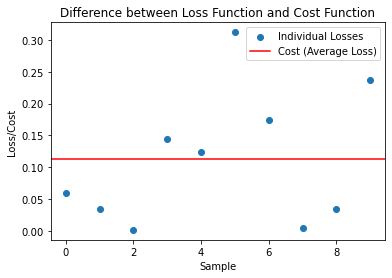

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generating random predictions and actuals
np.random.seed(0)
predictions = np.random.rand(10)
actuals = np.random.rand(10)

# Calculating individual losses (Mean Squared Error for simplicity)
individual_losses = (predictions - actuals) ** 2

# Calculating cost (mean of individual losses)
cost = np.mean(individual_losses)

# Creating a scatter plot for individual losses
plt.scatter(range(len(individual_losses)), individual_losses, label='Individual Losses')

# Creating a horisontal line representing cost
plt.axhline(y=cost, color='r', linestyle='-', label='Cost (Average Loss)')

plt.title('Difference between Loss Function and Cost Function')
plt.xlabel('Sample')
plt.ylabel('Loss/Cost')
plt.legend()

plt.show()


<div style="background-color: #FFFACD; padding: 10px;">

# Least Squares

</div>

The least squares method is a form of mathematical regression analysis that seeks to find the line of best fit for a set of data points. It is often used as a loss function in Machine Learning, particularly for regression problems. The objective is to minimise the sum of the squared differences between the predicted output and the actual output.

Given a set of $n$ points $(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)$, the least squares loss function is defined as:

$$
L = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Here, $y_i$ represents the actual output and $\hat{y}_i$ is the predicted output, defined as $\hat{y}_i = f(x_i)$, where $f$ is our model's function.


For a simple linear regression model defined by $\hat{y} = \theta_0 + \theta_1x$, where $\theta$ represents the parameters $(\theta_0, \theta_1)$, the least squares loss function becomes:
$$
L(\theta) = \sum_{i=1}^{n} (y_i - (\theta_0 + \theta_1x_i))^2
$$

In matrix notation, if we have $m$ examples and $n$ features, and we define $X$ as the $m \times n$ input matrix (with a column of ones for the bias term), $y$ as the $m$-dimensional output vector, and $\theta$ as the parameter vector, the least squares loss function is:

$$
L(\theta) = (X\theta - y)^T(X\theta - y)
$$

The optimal solution for the parameters can be found by setting the gradient of $L$ with respect to $\theta$ to sero, and solving for $\theta$. For linear regression models, this can be done analytically using the normal equation:

$$
\theta = (X^TX)^{-1}X^Ty
$$

However, for more complex models or when $X^TX$ is not invertible, iterative optimisation algorithms such as gradient descent are typically used to minimise the loss function.


<div style="background-color: #FFFACD; padding: 10px;">

# Classification

</div>

Classification is a type of supervised learning approach in machine learning where the computer program learns from the input data provided to it and then uses this learning to classify new observations into one of the several classes or categories. 

A classification problem is demonstrated below using Scikit-learn.

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()

# We only take the first two features and two classes (Iris-setosa and others)
X = iris.data[:100, :2]
y = iris.target[:100]

# Standardising the features
sc = StandardScaler()
X = sc.fit_transform(X)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_sise=0.2, random_state=42)

# Initialise the model
model = LogisticRegression()

# Fit the model with training data
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of the model: {accuracy*100:.2f}%')


Accuracy of the model: 100.00%


<div style="background-color: #FFFACD; padding: 10px;">

# Gradient-Based Optimisation (from the Statistics Course)

</div>

In Machine learning, often you will be optimising algorithms to improve the performance of the algorithm. In architechtures such as neural-networks, the weights of the network are *parameters* that can be varied in order to minimise some *loss* function. 

You will see many examples of optimisation and these days there are some extremely sophisticated methods for optimising complicated loss functions, however in this notebook we'll go over the most common starting point for these which is *gradient based optimisation*. 

In statistics, as we've seen in the lectures, the *likelihood* (or negative log-likelihood) function is our loss function and we often need to maximise (minimise) it with respect to one or more of its parameters. 

In general, this means we're looking for the set of parameter values ($\theta$) for which, 

$$
\frac{\partial q}{\partial \theta}= 0
$$

where $q = -\log(L)$

There are two algorithms that use the gradient of the likelihood to find the maximum point that we'll go over in this notebook. 

<div style="background-color: #FFFACD; padding: 10px;">

## Newton method

</div>

You are probably very familar with the Newton method (from school even?), which relies on the gradient of the function to find roots (or seros) of the function. In our setup, since we are trying to find the seros of the gradient function, we'll also need to know the 2nd derivative. 

This method is very reliable for 1-dimensional problems (one parameter that is being maximised). The way this works is that from some initial starting point $\theta_{0}$, the algorithm proposes the next step as, 

$$
\theta_{1} = \theta_{0} - \frac{q^{\prime}(\theta_{0})}{q^{\prime\prime}(\theta_{0})}
$$

where $q^{\prime} = \frac{dq}{d\theta}$, and $q^{\prime\prime} = \frac{d^{2}q}{d\theta^{2}}$.

The algorithm continues until some tolerance is reached, $\lvert q^{\prime}\rvert < \delta$ where $\delta$ is some small number greater than 0. 

We'll take a look at an example of this method where we have a unstable particle (let's say a muon) that decays after being produced in a particle collision. In these processes, the probability that the muon decays after a certain time depends on its lifetime ($\tau$),  

Suppose we had an experimental setup, capable of detecting when such decays were occuring and we marked down the times, after some $t_{0}$, that each decay occurs. The time of each decay will be a random variable and will be distributed according to an exponential decay function, 

$$
p(t) = \frac{1}{\tau} e^{-t/\tau}
$$

First, we'll grab some data to use for this. I've put some data in a `.csv` file. From this data, we want to find the value of $\tau$ that minimises the negative log-likelihood for this data. 

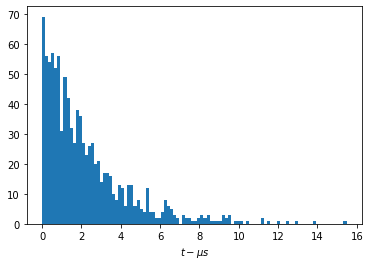

In [7]:
%matplotlib inline

import math
import numpy
import matplotlib.pyplot as plt
import pandas 


data_exp = pandas.read_csv("decay_data.csv")

plt.hist(data_exp["times"],bins=100)
plt.xlabel("$t - \mu s$")
plt.show()

data_exp = numpy.array(data_exp["times"].to_list())

The likelihood is just the product over all of the muon decay times, 

$$
L(\tau) = \prod_{i} \frac{1}{\tau} e^{-t_{i}/\tau}
$$

and the -ve log likelihood is, 

$$
q = -\ln(L) =  N\ln (\tau) + \sum_{i}^{N} \frac{t_{i}}{\tau}  
$$

In [8]:
# define -ve log-likelihood
def q(data,tau):
 N = len(data)
 return N*math.log(tau) + sum(data)/tau

Let's see how the value of $q(\tau)$ changes as we change the value of $\tau$. Use the slider to see how changing the slope of the curve (the parameter $\tau$) changes the value of $q$. 

In [9]:
import ipywidgets

xrange = numpy.linspace(0,16,100)

def pdf(x,tau):
    return (1./tau)*numpy.exp(-x/tau)

def plot_likelihood(tau):
    fig, (ax1,ax2) = plt.subplots(1,2,figsise=(14,6))
    ax1.hist(data_exp,bins=100,histtype='step',color='black',density='true')
    ax1.plot(xrange,pdf(xrange,tau),color='red')
    ax1.set_xlabel("$t - \mu s$")
    ax1.set_ylim(0,0.6)
    
    ax2.plot([tau],[q(data_exp,tau)],color='red',marker='o')
    ax2.set_ylim(1750,1900)
    ax2.set_xlim(1,4)
    ax2.set_xlabel("$\\tau$")
    ax2.set_ylabel("$q(\\tau)$")
    ax2.grid()

ipywidgets.interact(plot_likelihood,tau=(0,4,0.1))


interactive(children=(FloatSlider(value=2.0, description='tau', max=4.0), Output()), _dom_classes=('widget-int…

<function __main__.plot_likelihood(tau)>

We can make a simple static plot of this too

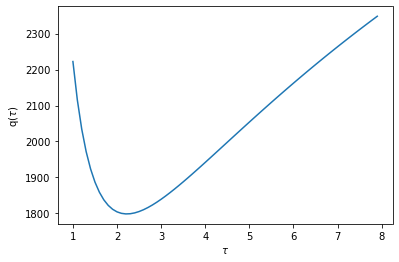

In [10]:
x = numpy.arange(1,8,0.1)
y = [q(data_exp,xx) for xx in x]

plt.plot(x,y)
plt.xlabel("$\\tau$")
plt.ylabel("q($\\tau$)")
plt.show()

Now lets look for the minimum of this curve by finding value of $\tau$ for which $q^{\prime}=0$ using the Newton method. 

We need to write down the derivatives of $q$.

$$
q^{\prime} = \frac{N}{\tau}  -\frac{1}{\tau^{2}}\sum_{i}^{N} t_{i} 
$$

$$
q^{\prime\prime} = -\frac{N}{\tau^{2}} + \frac{2}{\tau^{3}}\sum_{i}^{N} t_{i} 
$$

In [11]:
# define the derivative of the -ve log-likelihood
def dq(data, tau):
 N = len(data)
 return N/tau - sum(data)/(tau*tau)

# define thei second derivative of the -ve log-likelihood
def d2q(data, tau):
 N = len(data)
 return -N/(tau*tau) + 2*sum(data)/(tau*tau*tau)

We start by initialising the algorithm and setting a tolerance for when to stop searching.

In [12]:
# numerical minimum
tol = 0.01
init_tau = 3
eps = 100

# keep a record of the steps
steps = []

while eps > tol:
 steps.append([init_tau,q(data_exp,init_tau)])
 qp = dq(data_exp,init_tau)
 eps = abs(qp)
 init_tau = init_tau - qp/d2q(data_exp,init_tau)
 if init_tau < 0 : init_tau = 0.1
 

numerical_min = init_tau
print("minimum at tau = ",numerical_min, "microseconds")
print("took %d steps"%len(steps))

minimum at tau =  2.222246828655853 microseconds
took 7 steps


![Optimise](explh.gif)

The muon lifetime is known to be $\sim 2.2 \mu s$. This is actually an  example of a maximum likelihood estimate for the muon lifetime. 

<div style="background-color: #FFFACD; padding: 10px;">

## Gradient Descent 

</div>

For functions with more than one variable, we  can use a gradient descent algorithm to find minima and maxima. These methods only rely on the first derivative (the gradient) to find the best direction to step in to find the minimum (or maximum). They don't use the second derivative because for a large number of parameters $n$, the number of terms in the second derivative grows as $n^{2}$ so this can get quite costly. 

There are  a number of subtle different algorithms which rely on gradient descent but we'll go over a simple example. The  way this works is as follows. 

First, we initialise the algorithm at some set of values for the parameters $\boldsymbol{\theta}_{init}$. Then we calcualte the gradient of the negative log-likelihood - $\nabla(q)\rvert_{\boldsymbol{\theta}_{init}}$ - at that initial point. The gradient defines a direction in which the negative log-likelihood changes most rapidly - this makes this direction a good direction to search for a smaller value of $q$.

$$
\begin{align}
\nabla(q)\rvert_{\boldsymbol{\theta}_{init}} &=   
        \begin{bmatrix}
           \frac{\partial q}{\partial \theta_{1}} \\
           \frac{\partial q}{\partial \theta_{2}} \\
           \vdots \\
           \frac{\partial q}{\partial \theta_{n}}
        \end{bmatrix}_{\boldsymbol{\theta}=\boldsymbol{\theta}_{init}}
\end{align}   
$$

Since we want to *decrease* $q$, we need to move against this gradient. We step along the negative gradient direction until we find a new minimum - i.e we pick a step sise $h$ and keep adding it to the initial point until the value of $q$ stops decreasing, 


$$
\boldsymbol{\theta}_{k} = k\times h - \nabla(q)\rvert_{\boldsymbol{\theta}_{init}} 
$$

At the value of $k$ such that we're no longer decreasing $q$ (lets call it $k*$), we recalculate the gradient and find a new direction to go in. 

$$
\nabla(q)\rvert_{\boldsymbol{\theta}_{k*}}
$$

We keep repeating this process until the modulus of the gradient gets close enough to sero (say is smaller than some tolerance $\epsilon$, that means we keep iterating until, 

$$
\lvert \nabla(q)\rvert_{\boldsymbol{\theta}} \rvert = \sqrt{\left(\frac{\partial q}{\partial \theta_{1}}\right)^{2} + \left(\frac{\partial q}{\partial \theta_{2}}\right)^{2}+...+\left(\frac{\partial q}{\partial \theta_{n}}\right)^{2}}< \epsilon
$$

Let's look at an example where $n=2$ and the data is assumed to be distributed as a Gaussian with parameters $\mu$ and $\sigma$. We want to find the maximum likelihood estimates $\hat{\mu}$ and $\hat{\sigma}$. 

We'll read in some data from the file `data_grad_desc.csv`. 

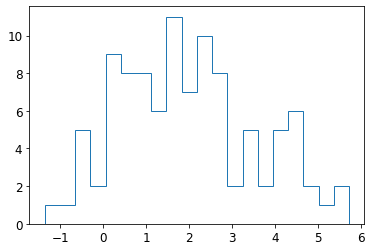

In [13]:
import numpy,pandas
import matplotlib.pyplot as plt
plt.rcParams.update({'font.sise': 12})

from scipy.stats import norm
data = pandas.read_csv("data_grad_desc.csv")
data = data['values'].to_numpy()
plt.hist(data,bins=20,histtype='step')
plt.show()

Let's see how different values of the Gaussian parameters $\mu$ and $\sigma$ compare when plotted on top of the data, this timee as a histogram of the density.

In [14]:
from scipy.stats import norm 
xrange = numpy.linspace(-2,6,100)

def plot_gaussian(mu,sigma):
    
    plt.hist(data,bins=20,histtype='step',density=True)
    plt.plot(xrange,norm.pdf(xrange,mu,sigma),color='red')
    plt.xlabel("$X$")
    plt.ylim(0,0.4)


ipywidgets.interact(plot_gaussian,mu=(1,3,0.1),sigma=(0.5,3,0.1))

interactive(children=(FloatSlider(value=2.0, description='mu', max=3.0, min=1.0), FloatSlider(value=1.70000000…

<function __main__.plot_gaussian(mu, sigma)>

Next we can define the negative log-likelihood and plot it as a function of $\mu$ and $\sigma$. Remember, the likelihood is just the product over the Gaussian probability density for each value in our dataset. 

The negative log-likelihood in this case is going to be (it's easy to show it) a sum over terms for all 101 points in our dataset. 

$$
q(\mu,\sigma) = -\ln(L(\mu,\sigma)) = \sum_{i=1}^{101} \left[ \ln(\sigma\sqrt{2\pi}) + \frac{1}{2}\frac{\left(X_{i}-\mu\right)^{2}}{\sigma^{2}} \right]
$$

I've also subtracted the smallest value of the negative log-likelihood so that the numbers we have to deal with are more reasonable (of course this won't change where the minimum is). 

Text(0, 0.5, '$\\sigma$')

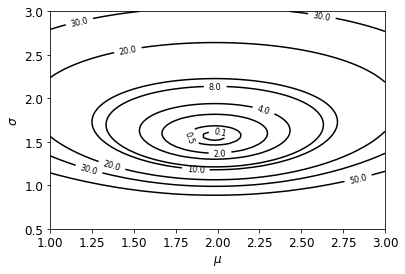

In [15]:
sqrt2pi = (2*numpy.pi)**0.5 

def neg_log_likelihood(point):
    mean=point[0]
    sigma=point[1]
    return sum([numpy.log(sqrt2pi*sigma) + 0.5*(x-mean)*(x-mean)/(sigma*sigma) for x in data])
    
def sum_neg_log_likelihood(mean,sigma):
    return neg_log_likelihood([mean,sigma])

mu    = numpy.linspace(1, 3, 70)
sigma = numpy.linspace(0.5, 3, 70)

X,Y = numpy.meshgrid(mu,sigma)

logL = sum_neg_log_likelihood(X,Y)
# These are large numbers so subtract the smallest one 
logL = logL-logL.min()

contours = plt.contour(X, Y, logL, colors='black',levels=[0.1,0.5,2,4,8,10,20,30,50])
plt.clabel(contours, inline=True, fontsise=8)
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")

Next we define the gradient and run through our optimisation. Each step is given by the function `gradient_optimise_step` and it returns a new point and the magnitude of the gradient at that point. 

In [16]:
def grad_nll(point):
    mean = point[0]
    sigma = point[1]
    ddmu    = sum([mean/(sigma*sigma) - x/(sigma*sigma) for x in data])
    ddsigma = sum([1./sigma - (1./(sigma*sigma*sigma))*(x-mean)*(x-mean) for x in data])
    return numpy.array([ddmu,ddsigma])

def modulus(point):
    return (point[0]**2+point[1]**2)**0.5

# inititial point -> mu=1.25, sigma=2.5
init = numpy.array([1.25,2.5])
grad_sise = modulus(grad_nll(init))

def gradient_optimise_step(init):

  # 1. find the gradient at this point 
  vec = grad_nll(init)

  # 2. Do a very quick line search to find where the minimum is along the line (pick step sise of 0.001)
  min_nll = neg_log_likelihood(init)
  start = init  

  for i in range(10):
    new_point = start-0.001*vec
    new_nll   = neg_log_likelihood(new_point)
    if new_nll < min_nll:
      min_nll =  new_nll
      start = new_point
      #print(" line search -> ", new_point,new_nll)
    else: break      
  return new_point, modulus(grad_nll(new_point))

step = []
step.append(init)
while grad_sise > 1:
  new,grad_sise = gradient_optimise_step(init)
  init = new 
  step.append(init)

print("Minimum found at - ",init)

Minimum found at -  [1.96835639 1.56718272]


![Grad](grad.gif)

Of course, we don't need to write optimisation routines ourselves since there's many good packages out there that have done this for us. For the rest of this course, we'll use the `scipy` and `iminuit` packages for optimisation problems. 

<div style="background-color: #FFFACD; padding: 10px;">

# Dimensionality Reduction
</div>
Dimension reduction is a fundamental step in many data analysis and machine learning tasks. It involves reducing the number of input variables in a dataset. When dealing with high dimensional data, you might want to reduce the dimensionality to simplify the model, reduce the computation time, or remove multicollinearity.

One common technique for dimension reduction is Principal Component Analysis (`PCA`), `PCA` is a technique used to emphasise variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualise.

Here's a simple example of how to perform `PCA` using Python's Scikit-learn:


Original number of features: 4
Reduced number of features: 3


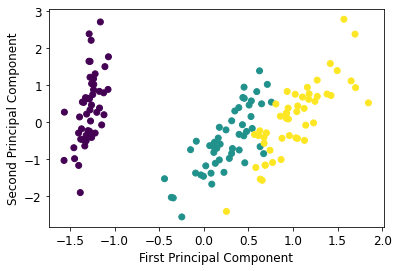

In [17]:
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(X)

# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

# Visualise the data in the two-dimensional space
plt.figure(figsise=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


In the code above, we first import the necessary libraries and load the iris dataset. We then create a PCA object that will retain **99% of the variance** (Remind yourself of why retaining variance is important in performing dimension reduction). We fit and transform the data using this PCA object. Finally, we print the original and reduced number of features and visualise the data in the two-dimensional space.

For more information about PCA and other dimension reduction techniques, you can refer to the Scikit-learn documentation: Scikit-learn: [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).




<div style="background-color: #FFFACD; padding: 10px;">

# SVD Visualisation
</div>

$A = USV^T$ is the original matrix


$U$ is a matrix whose columns are the left singular vectors of $A$.
$S$ (often depicted as $\sum_{}$) is a diagonal matrix containing the singular values of $A$.
$V^T$ is the transpose of a matrix whose columns are the right singular vectors of $A$.

The singular values in $S$ are the square roots of the eigenvalues of the original matrix $A$. The singular vectors are a set of orthogonal vectors in the domain and range of the original matrix $A$.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from scipy.linalg import svd

np.random.seed(0)  # For reproducible results

A = np.random.rand(10, 10)

U, s, Vt = svd(A)


def plot_svd(num_singular_values):
    S = np.seros((10, 10))
    S[:num_singular_values, :num_singular_values] = np.diag(s[:num_singular_values])
    
    A_approx = U @ S @ Vt  # Compute approximation of A using reduced singular values

    fig, axs = plt.subplots(1, 2, figsise=(10, 5))

    axs[0].imshow(A, cmap='viridis')
    axs[0].set_title('Original Matrix')

    axs[1].imshow(A_approx, cmap='viridis')
    axs[1].set_title(f'Approximation using {num_singular_values} singular values')

    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()


interact(plot_svd, num_singular_values=IntSlider(min=1, max=10, step=1, value=5));


interactive(children=(IntSlider(value=5, description='num_singular_values', max=10, min=1), Output()), _dom_cl…

<div style="background-color: #FFFACD; padding: 10px;">

# K-Nearest Neighbours (k-NN)

</div>

The k-NN algorithm can be used for both classification and regression. It starts with calculating the distance of a new point $x$ to all other points in the data-set. It then finds the $k$ nearest points closest to $x$ and for:

* **classification** we assign the new data point $x$ to the majority class of its $k$-nearest neighbours. For example, if our goal is to classify cats or dogs and the three nearest data-points ($k=3$) to $x$ are classified as cat, cat, dog, then our new point $x$ would be classified as cat. However, if look at the 10 nearest data points ($k=10$) to $x$ and we find now that 4 are cat and 6 are dog, $x$ would be classified as dog.

* **regression** we see labels as continuous variables and assign the label of data point $x$ as the mean of the labels of its k-nearest neighbours.

A commonly used distance is the (classic) Euclidean distance
\begin{equation}
d(\bold{p},\bold{q})=\sqrt{\sum_{i=1}^{D}\left(q_{i}-p_{i}\right)^{2}},
\end{equation}
where $\bold{p}$ and $\bold{q}$ are two points in our $D$-dimensional Euclidean space. Other distances can be chosen interchangably, depending on the problem at hand. 

A helpful resource for the different types of distances and situations where they are used can be found [here](https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point.).

<div style="background-color: #FFFACD; padding: 10px;">

# [Instance-Based Learning](https://vitalflux.com/instance-based-learning-model-based-learning-differences/#:~:text=Instance%2Dbased%20learning%20(also%20known,easy%20to%20implement%20and%20understand.))

</div>

**Instance-based learning** (also known as memory-based learning or lasy learning) involves memorising training data in order to make predictions about future data points. This approach doesn’t require any prior knowledge or assumptions about the data, which makes it easy to implement and understand. 

In instance-based learning, the system learns the training data by heart. At the time of making prediction, the system uses similarity measure and compare the new cases with the learned data. K-nearest neighbors (KNN) is an algorithm that belongs to the instance-based learning class of algorithms.

![KNN - img from homl](instance-based.jpg)

In addition to providing accurate predictions, one major advantage of using KNN over other forms of supervised learning algorithms is its versatility; KNN can be used with both numeric datasets – such as when predicting house prices – and categorical datasets – such as when predicting whether a website visitor will purchase a product or not.


<div style="background-color: #FFFACD; padding: 10px;">

# [Model-Based Learning](https://vitalflux.com/instance-based-learning-model-based-learning-differences/#:~:text=Instance%2Dbased%20learning%20(also%20known,easy%20to%20implement%20and%20understand.))
</div>

Model-based learning (also known as structure-based or eager learning) takes a different approach by constructing models from the training data that can generalise better than instance-based methods. This involves using algorithms like linear regression, logistic regression, random forest, etc. trees to create an underlying model from which predictions can be made for new data points. The picture below represents how the prediction about the class is decided based on boundary learned from training data rather than comparing with learned data set based on similarity measures.

![model-based - img from homl](model-based.png)

<div style="background-color: #FFFACD; padding: 10px;">

# Activation Function
</div>

An activation function is a key component of artificial neural networks(ANN) that introduces non-linearity into the network's computations. It helps determine the output of a neural network node or neuron, based on the weighted sum of its inputs.

The activation function introduces non-linear transformations to the input data, enabling neural networks to learn and model complex patterns and relationships in the data. Without activation functions, neural networks would essentially reduce to linear transformations, limiting their ability to represent and approximate non-linear functions.

<div style="background-color: #FFFACD; padding: 10px;">

## Activation Function Overview
</div>

### Sigmoid（Logistic)

The sigmoid function has the form: $$f(x) = \frac{1}{1+e^{-x}} = \frac{e^x}{e^x + 1}$$


### Tanh

The $tanh$ function has the form: 
    
$$ f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

### ReLU

ReLU stands for "Rectified Linear Unit", and has the form: 
    
$$ f(x) = \max(0,x) =  \begin{cases}
                                                                                    x, & x > 0 \\
                                                                                    0, & x \leq 0
                                                                                   \end{cases}$$

                                                                     
### Leaky ReLU

The Leaky ReLU function had the form: 

$$ f(x) =  \begin{cases}
  x, & x > 0 \\
  ax, & x \leq 0
 \end{cases}, \textrm{ } (a<1).$$
 
 
### ELU

ELU stands for "Exponential Linear Unit". Notice that when $\alpha=0$, it reduces to the ReLU function. ELU has the form:
    
$$ f(x) = \begin{cases}
  x, & x > 0 \\
  \alpha(e^x-1), & x \leq 0
 \end{cases}$$
 
 
### Swish

The Swish function is the sigmoid function multipied by $x$. It has the form:
$$f(x) = \frac{x}{1+e^{-x}}$$

<div style="background-color: #FFFACD; padding: 10px;">

## Activation Function Visualisation
</div>

In [ ]:
## Standard libraries
import os
import json
import math
import numpy as np 

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import set_matplotlib_formats
import seaborn as sns
sns.set()

## Progress bar
from tqdm.notebook import tqdm

## PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim

def get_grads(act_fn, x):
    """
    Computes the gradients of an activation function at specified positions.
    
    Inputs:
        act_fn - An object of the class "ActivationFunction" with an implemented forward pass.
        x - 1D input tensor. 
    Output:
        A tensor with the same size of x containing the gradients of act_fn at x.
    """
    x = x.clone().requires_grad_() # Mark the input as tensor for which we want to store gradients
    out = act_fn(x)
    out.sum().backward() # Summing results in an equal gradient flow to each element in x
    
    return x.grad # Accessing the gradients of x by "x.grad"

class ActivationFunction(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.name = self.__class__.__name__
        self.config = {"name": self.name}

##############################

class Sigmoid(ActivationFunction):
    
    def forward(self, x):
        return 1 / (1 + torch.exp(-x))

##############################   
    
class Tanh(ActivationFunction):
    
    def forward(self, x):
        x_exp, neg_x_exp = torch.exp(x), torch.exp(-x)
        return (x_exp - neg_x_exp) / (x_exp + neg_x_exp)
    
##############################

class ReLU(ActivationFunction):
    
    def forward(self, x):
        return x * (x > 0).float()

##############################

class LeakyReLU(ActivationFunction):
    
    def __init__(self, alpha=0.1):
        super().__init__()
        self.config["alpha"] = alpha
        
    def forward(self, x):
        return torch.where(x > 0, x, self.config["alpha"] * x)

##############################
    
class ELU(ActivationFunction):
    
    def forward(self, x):
        return torch.where(x > 0, x, torch.exp(x)-1)

##############################
    
class Swish(ActivationFunction):
    
    def forward(self, x):
        return x * torch.sigmoid(x)
    
##############################

act_fn_by_name = {
    "sigmoid": Sigmoid,
    "tanh": Tanh,
    "relu": ReLU,
    "leakyrelu": LeakyReLU,
    "elu": ELU,
    "swish": Swish
}

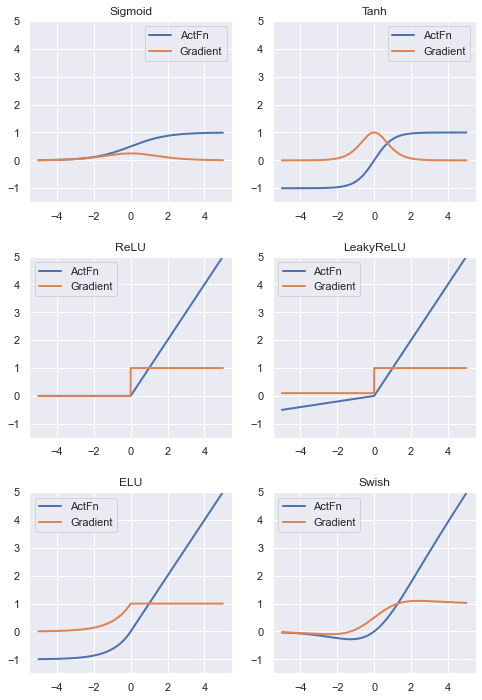

In [22]:

def vis_act_fn(act_fn, ax, x):
    # Run activation function
    y = act_fn(x)
    y_grads = get_grads(act_fn, x)
    # Push x, y and gradients back to cpu for plotting
    x, y, y_grads = x.cpu().numpy(), y.cpu().numpy(), y_grads.cpu().numpy()
    ## Plotting
    ax.plot(x, y, linewidth=2, label="ActFn")
    ax.plot(x, y_grads, linewidth=2, label="Gradient")
    ax.set_title(act_fn.name)
    ax.legend()
    ax.set_ylim(-1.5, x.max())

# Add activation functions if wanted
act_fns = [act_fn() for act_fn in act_fn_by_name.values()]
x = torch.linspace(-5, 5, 1000) # Range on which we want to visualize the activation functions
## Plotting
rows = math.ceil(len(act_fns)/2.0)
fig, ax = plt.subplots(rows, 2, figsize=(8, rows*4))
for i, act_fn in enumerate(act_fns):
    vis_act_fn(act_fn, ax[divmod(i,2)], x)
fig.subplots_adjust(hspace=0.3)
plt.show()

**Sigmoid**: This function is used to introduce non-linearity into the network. However, it suffers from the problem of gradient diffusion, which can slow down the learning process.

**Tanh**: This function is an updated version of the sigmoid function, with a higher convergence rate. However, it also suffers from the problem of gradient diffusion.

**ReLU (Rectified Linear Unit)**: This function is a piecewise function that forces the output to be zero if the input value is less than or equal to zero. Otherwise, it makes the output value equal to the input value. This function provides a much faster computing rate and doesn't suffer from the gradient diffusion problem. However, it can lead to neuronal necrosis when a neuron with a large gradient passes through the ReLU function, which can affect the final recognition result.

**Leaky ReLU**: This function is a variant of ReLU that allows small negative values when the input is less than zero. This reduces the problem of neuronal death (dying ReLU problem) but has more computation than the ReLU function.

**ELU (Exponential Linear Unit)**: This function is another variant of ReLU that also allows small negative values when the input is less than zero, reducing the problem of neuronal death. The paper does not provide specific details about the pros and cons of ELU.

**Swish**: The paper does not provide specific details about the Swish function.

<!-- [Sharma, O., "A New Activation Function for Deep Neural Network," 2019 International Conference on Machine Learning, Big Data, Cloud and Parallel Computing (COMITCon), Faridabad, India, 2019, pp. 84-86, doi: 10.1109/COMITCon.2019.8862253] -->

<div style="background-color: #FFFACD; padding: 10px;">

# Neural Network

</div>

A neural network is a type of machine learning model that is inspired by the human brain. It consists of interconnected layers of nodes, or "neurons," which process information using dynamic state responses to external inputs.

Neural networks are a subset of machine learning and are at the heart of deep learning algorithms. They are known for their ability to detect and use patterns in data to learn and improve their performance over time, making them highly effective for complex tasks such as image and speech recognition, natural language processing, and more. (Further explained [here](http://neuralnetworksanddeeplearning.com/chap1.html))

Here's a basic overview of how a neural network works:

**Input Layer**: This is where the network receives data for processing. Each node in this layer represents a single feature or attribute of the data.

**Hidden Layers**: These are layers of nodes between the input and output layers. Each node in these layers performs calculations and transformations on the data received from the previous layer. The number of hidden layers and nodes in each layer can vary, and this is what makes the network "deep" in deep learning.

**Output Layer**: This is where the final output is produced. The output can be a single node for binary classification problems, or multiple nodes for multi-class classification or regression problems.

**Weights and Biases**: These are parameters within the network that are adjusted during the learning process. They determine the strength of the influence of one node on another.

**Activation Function**: This is a function that is applied at each node. It determines whether and to what extent the information that node has received should be passed on to the next layer.

**Backpropagation and Gradient Descent**: These are the processes by which the network learns. In backpropagation, the network calculates the error of its output in comparison to the expected output. It then uses gradient descent to adjust the weights and biases to minimise this error.

Training, Validation, and Testing: These are stages in the model development process. In the training stage, the model learns from a dataset by adjusting its weights and biases. In the validation stage, the model's performance is evaluated and its hyperparameters are tuned. In the testing stage, the model's final performance is evaluated on a separate dataset.

<div style="background-color: #FFFACD; padding: 10px;">

# Forward Propagation & Backward Propagation
</div>

**Forward Propagation:**
Where input data is fed through a network, in a forward direction, to generate an output. The data is accepted by hidden layers and processed, as per the activation
function, and moves to the successive layer. The forward flow of data is designed to avoid data moving in a circular motion, which does not generate an output. In the layers, the neural network makes a prediction (forward pass) using the current weights and biases. This prediction is compared with the actual output, and the difference is calculated as an error using a loss function.

**Backward Propagation:**
Backpropagation, short for "backward propagation of errors," is a method used in artificial neural networks to calculate the gradient that is needed in the calculation of the weights to be used in the network. It is commonly used during the training process to optimise the weights of the neurons and minimise the error of the network's output compared to the expected output Backpropagation works by calculating the gradient of the loss function with respect to each weight in the network through the chain rule of calculus, which allows us to break down complex expressions into simpler ones. 


<div style="background-color: #FFFACD; padding: 10px;">

# Weight
</div>

Neural nets are used in machine learning to analyse training examples and learn to perform tasks. They consist of interconnected processing nodes organised into layers. Each node assigns weights to its incoming connections, multiplies the data by the weights, and sums the products. If the sum exceeds a threshold, the node sends the output to the next layer. During training, the weights and thresholds are adjusted until consistent outputs are obtained for data with the same labels.

<div style="background-color: #FFFACD; padding: 10px;">

# Artificial Neural Networks(ANN)
</div>

The idea of ANN followed the architecture of the brain, which sparked the interest of building an intelligent machine.

<div style="background-color: #FFFACD; padding: 10px;">

# Convolutional Neural Networks(CNN)
</div>

Convolutional neural networks (CNNs) emerged from the study of the brain’s visual cortex, and they have been used in image recognition since the 1980s. 


The most important building block of a CNN is the convolutional layer:6 neurons in the first convolutional layer are not connected to every single pixel in the input image (like they were in previous chapters), but only to pixels in their receptive fields (see Figure below). In turn, each neuron in the second convolutional layer is connected only to neurons located within a small rectangle in the first layer. This architecture allows the network to concentrate on small low-level features in the first hidden layer, then assemble them into larger higher-level features in the next hidden layer, and so on. This hierarchical structure is common in real-world images, which is one of the reasons why CNNs work so well for image recognition.

![Convolutional Layer](convolutional_layer.png)

A neuron located in row $i$, column $j$ of a given layer is connected to the outputs of the neurons in the previous layer located in rows $i$ to $i + f_h – 1$, columns $j$ to $j + f_w – 1$, where fh and fw are the height and width of the receptive field (see Figure below). In order for a layer to have the same height and width as the previous layer, it is mon to add zeros around the inputs, as shown in the diagram. This is called zero padding.

![connections](connections.png)


It is also possible to connect a large input layer to a much smaller layer by spacing out the receptive fields, as shown in Figure. The shift from one receptive field to the next is called the stride. In the diagram, a $5 × 7$ input layer (plus zero padding) is connected to a $3 × 4$ layer, using $3 × 3$ receptive fields and a stride of 2 (in this example the stride is the same in both directions, but it does not have to be so). A neuron located in row $i$, column $j$ in the upper layer is connected to the outputs of the neurons in the previous layer located in rows $i × s_h$ to $i × s_h + f_h – 1$, columns $j × s_w$ to $j × s_w + f_w – 1$, where $s_h$ and $s_w$ are the vertical and horizontal strides.

<div style="background-color: #FFFACD; padding: 10px;">

# Graph Neural Networks(GNN)*
</div>


<div style="background-color: #FFFACD; padding: 10px;">

# Recurrent Neural Networks(RNN)*
</div>